# **Exploring National Anthems: A Data Journey**

## **Introduction**

Welcome to the captivating world of national anthems! 🌍🎶 In this data science project, we embark on a musical voyage across continents, exploring the lyrical expressions that resonate with patriotism, history, and culture. Our dataset contains the stirring verses of anthems from diverse nations, each encapsulating the spirit of its people.

### **Project Goals**

Our mission is twofold:

1. **Uncover Anthem Themes**: We'll dissect the anthems, unraveling their hidden themes and sentiments. Are there common threads that bind anthems together? Do certain regions favor love, war, or freedom in their lyrical odes?


### **Tools at Our Disposal**

We'll wield three powerful tools:

1. **K-Means Clustering**: Like musical harmonies, K-Means will group anthems into clusters based on their lyrical content. Are there clusters of anthems celebrating unity, resilience, or nature?

2. **Power BI**: Our canvas for visual storytelling! Power BI dashboards will breathe life into our data, allowing us to explore trends, sentiments, and geographic patterns.

3. **Natural Language Processing (NLP)**: NLP will decode the poetic language. We'll analyze sentiments, spot historical references, and identify notable entities—whether they're legendary heroes or cherished landscapes.

## Final Briefings will start at 2:30pm on Friday. Everyone will be expected to bring their insights to the table. You may use a notebook OR PowerPoint OR PowerBI to brief
    - 10 min MAX breifing times
    - Final output should be data driven insights (think actionable!)
    - If Python and/or Machine Learning is not your jam, analyze the data YOUR way, just get me insights! 

### **Let the Anthem Symphony Begin! 🎵**

Gather your curiosity, tune your analytical instruments, and let's dive into the rich tapestry of national anthems. From the Himalayan peaks to the African savannas, every stanza carries a tale waiting to be told.

---

## Remember, data science is not just about numbers—it's about weaving narratives from raw data. So, let's harmonize data and creativity, and celebrate the anthems that echo through time! 🌟🎤

In [1]:
# To remove pink color notifications
import warnings
warnings.filterwarnings("ignore")

# For dataframe & array computations
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For train-test split
from sklearn.model_selection import train_test_split

# For ML models
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# For metrics
from sklearn import metrics

# For ML NLP#
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [2]:
%matplotlib inline

In [3]:
# ! python -m textblob.download_corpora -y

In [4]:
import sys
# Check for python version
req_version = (2,5)
cur_version = sys.version_info
cur_version

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [5]:
#national anthems dataset read from csv

anthems_df = pd.read_csv('national_anthems.csv')

In [6]:
anthems_df #shows 5 columns (Country, Alpha2:Alpha3 - delete, Continent, Anthem) and 190 rows of text.  Add  

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [7]:
anthems_df.shape

(190, 5)

In [8]:
anthems_df.index

RangeIndex(start=0, stop=190, step=1)

In [9]:
anthems_df.nunique
#all unique 

<bound method DataFrame.nunique of             Country Alpha-2 Alpha-3 Continent  \
0           Albania      AL     ALB    Europe   
1           Armenia      AM     ARM    Europe   
2           Austria      AT     AUT    Europe   
3        Azerbaijan      AZ     AZE    Europe   
4           Belarus      BY     BLR    Europe   
..              ...     ...     ...       ...   
185         Tunisia      TN     TUN    Africa   
186          Uganda      UG     UGA    Africa   
187  Western Sahara      EH     ESH    Africa   
188          Zambia      ZM     ZMB    Africa   
189        Zimbabwe      ZW     ZWE    Africa   

                                                Anthem  
0    Around our flag we stand united, With one wish...  
1    Our Fatherland, free, independent, That has fo...  
2    Land of mountains, land by the river, Land of ...  
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4    We, Belarusians, are peaceful people, Wholehea...  
..                                

In [10]:
anthems_df.describe()
#189 unique anthems ??  Albania is 

,Country,Alpha-2,Alpha-3,Continent,Anthem
count,190,189,190,190,190
unique,190,188,190,6,188
top,Albania,CH,ALB,Africa,"Arise, ye who refuse to be slaves; With our ve..."
freq,1,2,1,56,2


In [11]:
anthems_df.info()
# data types all object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [12]:
anthems_df.isnull().mean()
# has nulls Alpha-2      0.005263

Country      0.000000
Alpha-2      0.005263
Alpha-3      0.000000
Continent    0.000000
Anthem       0.000000
dtype: float64

In [13]:

# Drop two columns
anthems_df = anthems_df.drop(columns=['Alpha-2', 'Alpha-3'])

# Display the updated dataframe
print(anthems_df)

#I now have 190 rows, 3 columns. 

            Country Continent  \
0           Albania    Europe   
1           Armenia    Europe   
2           Austria    Europe   
3        Azerbaijan    Europe   
4           Belarus    Europe   
..              ...       ...   
185         Tunisia    Africa   
186          Uganda    Africa   
187  Western Sahara    Africa   
188          Zambia    Africa   
189        Zimbabwe    Africa   

                                                Anthem  
0    Around our flag we stand united, With one wish...  
1    Our Fatherland, free, independent, That has fo...  
2    Land of mountains, land by the river, Land of ...  
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4    We, Belarusians, are peaceful people, Wholehea...  
..                                                 ...  
185  O defenders of the Homeland! Rally around to t...  
186  Oh Uganda! May God uphold Thee, We lay our fut...  
187  O sons of the Sahara! In the battlefield, you ...  
188  Stand and sing of Zambia, pr

In [14]:
anthems_df.Continent.value_counts()
#The number of National Anthems per Continent

Continent
Africa           56
Europe           44
Asia             44
North_America    24
South_America    12
Oceania          10
Name: count, dtype: int64

In [15]:
#Create a new DF with only  - not yet ... 



In [16]:
# Split the new DataFrame into training and testing sets.  Default test_size=.25
X_train, X_test, y_train, y_test = train_test_split(anthems_df.Anthem, anthems_df.Continent, random_state=1)

In [17]:
#let's see what training this stuff will do ...

#Training X 
print(X_train.shape)
X_train.head()

(142,)


114    Woven from hundreds of flowers, we are one gar...
48     Oh, unwithering glory! Oh, immortal jubilance!...
162    O God bless our land of Malawi, Keep it a land...
167    In the memory of Africa and the World Beautifu...
135    O Fatherland, we shall never forget The heroes...
Name: Anthem, dtype: object

In [18]:
#Training y
print(y_train.shape)
y_train.head()

(142,)


114             Asia
48     South_America
162           Africa
167           Africa
135           Africa
Name: Continent, dtype: object

In [19]:
#Testing X
print(X_test.shape)
X_test.head()

(48,)


31     Poland has not yet died, So long as we still l...
66     Noble homeland, your beautiful flag Expresses ...
112    Our sacred independent country Is the ancestra...
120    I Swear, I Swear Swearing by the one who raise...
81     O arise all you sons of this land, Let us sing...
Name: Anthem, dtype: object

In [20]:
#Testing y
print(y_test.shape)
y_test.head()

(48,)


31            Europe
66     North_America
112             Asia
120             Asia
81           Oceania
Name: Continent, dtype: object

In [21]:
#Training and Testing conclusions: 

#Test set has 48 (25%), Training set has 142 (75%). 


In [22]:
# Use CountVectorizer to create document-term matrices from X_train and X_test 
# i.e., convert a collection of text documents to a matrix of token counts
vect = CountVectorizer()

# Vectorize the data
train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
test_dtm = vect.transform(X_test)        # transform to document-term matrix based on the vocabulary learned during the fitting

In [23]:
# rows are documents, columns are terms (aka "tokens" or "features")
train_dtm.shape

#there are 142 "documents" and 3161 "tokens" or "features"

(142, 3161)

In [24]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['working' 'world' 'worlds' 'worries' 'worshiping' 'worth' 'worthy'
 'would' 'wouldn' 'wound' 'wounded' 'woven' 'wrapped' 'wrathfully'
 'writings' 'written' 'wrong' 'wrote' 'wrought' 'yamuna' 'ye' 'yearns'
 'years' 'yellow' 'yemen' 'yemenite' 'yes' 'yesterday' 'yet' 'yielded'
 'yielding' 'yoke' 'yonder' 'yore' 'you' 'young' 'your' 'yours' 'yourself'
 'yourselves' 'youth' 'youthful' 'zambezi' 'zeal' 'zealand' 'zenith'
 'zimbabwe' 'zion' 'ãƒâ' 'œending']


In [25]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('botswana', 321),
 ('carib', 411),
 ('manhood', 1715),
 ('linger', 1631),
 ('despots', 707),
 ('tranquil', 2838),
 ('haven', 1280),
 ('sod', 2525),
 ('rod', 2304),
 ('longer', 1654),
 ('hewers', 1325),
 ('baymen', 214),
 ('clan', 481),
 ('armour', 135),
 ('untold', 2923),
 ('roll', 2305),
 ('drove', 800),
 ('rio', 2281),
 ('hondo', 1357),
 ('sarstoon', 2356),
 ('coral', 566),
 ('lagoon', 1554),
 ('noon', 1877),
 ('cameroon', 396),
 ('shrine', 2469),
 ('midst', 1764),
 ('repose', 2232),
 ('tillage', 2796),
 ('rose', 2311),
 ('due', 803),
 ('welfare', 3045),
 ('endearment', 851),
 ('evermore', 903),
 ('mungo', 1816),
 ('meanders', 1746),
 ('lowly', 1676),
 ('boumba', 322),
 ('muster', 1821),
 ('buea', 365),
 ('team', 2727),
 ('instil', 1463),
 ('regret', 2198),
 ('errors', 887),
 ('foster', 1088),
 ('tatras1', 2724),
 ('slovaks', 2511),
 ('revive', 2261),
 ('slovakia', 2510),
 ('sleeping', 2506),
 ('lightnings', 1621)]

In [26]:
# Don't convert to lowercase
vect = CountVectorizer(lowercase=False)
train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
train_dtm.shape

#In this we went from : 

#vect = CountVectorizer()
#train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
#test_dtm = vect.transform(X_test)  

#to what's above.  not sure why.  the difference is the (lowercase=False)  ... This last one gave us 3631 "features"

(142, 3631)

In [27]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('haven', 2051),
 ('sod', 3075),
 ('rod', 2893),
 ('longer', 2353),
 ('hewers', 2092),
 ('Baymen', 78),
 ('clan', 1344),
 ('armour', 1070),
 ('Drive', 230),
 ('untold', 3420),
 ('roll', 2894),
 ('Drove', 231),
 ('Rio', 691),
 ('Hondo', 382),
 ('Sarstoon', 718),
 ('coral', 1413),
 ('lagoon', 2269),
 ('noon', 2527),
 ('Cameroon', 137),
 ('Cradle', 190),
 ('Shrine', 750),
 ('midst', 2441),
 ('repose', 2824),
 ('tillage', 3312),
 ('rose', 2897),
 ('due', 1625),
 ('welfare', 3532),
 ('Promise', 645),
 ('endearment', 1666),
 ('evermore', 1713),
 ('Mungo', 557),
 ('meanders', 2428),
 ('lowly', 2373),
 ('Boumba', 110),
 ('Stream', 794),
 ('Muster', 559),
 ('Buea', 126),
 ('team', 3252),
 ('Instil', 408),
 ('Regret', 676),
 ('errors', 1699),
 ('Foster', 294),
 ('Tatras1', 819),
 ('Thunders', 848),
 ('stop', 3165),
 ('Slovaks', 764),
 ('revive', 2853),
 ('Slovakia', 763),
 ('sleeping', 3059),
 ('lightnings', 2325)]

In [28]:
# Allow tokens of one character
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(142, 3173)

In [29]:
print(vect.get_feature_names_out()[-50:])

['worries' 'worshiping' 'worth' 'worthy' 'would' 'wouldn' 'wound'
 'wounded' 'woven' 'wrapped' 'wrathfully' 'writings' 'written' 'wrong'
 'wrote' 'wrought' 'yamuna' 'ye' 'yearns' 'years' 'yellow' 'yemen'
 'yemenite' 'yes' 'yesterday' 'yet' 'yielded' 'yielding' 'yoke' 'yonder'
 'yore' 'you' 'young' 'your' 'yours' 'yourself' 'yourselves' 'youth'
 'youthful' 'zambezi' 'zeal' 'zealand' 'zenith' 'zimbabwe' 'zion' 'â' 'ã'
 'ãƒâ' 'å' 'œending']


In [30]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[0:50:]

[('woven', 3131),
 ('from', 1112),
 ('hundreds', 1394),
 ('of', 1903),
 ('flowers', 1047),
 ('we', 3042),
 ('are', 126),
 ('one', 1917),
 ('garland', 1143),
 ('that', 2755),
 ('s', 2337),
 ('nepali', 1857),
 ('spread', 2592),
 ('sovereign', 2565),
 ('mechi', 1755),
 ('to', 2812),
 ('mahakali', 1701),
 ('a', 2),
 ('shawl', 2450),
 ('nature', 1843),
 ('wealth', 3046),
 ('unending', 2913),
 ('the', 2756),
 ('blood', 286),
 ('braves', 338),
 ('nation', 1838),
 ('free', 1104),
 ('and', 97),
 ('non', 1881),
 ('moving', 1817),
 ('land', 1562),
 ('knowledge', 1544),
 ('peace', 1979),
 ('plains', 2020),
 ('hills', 1337),
 ('mountains', 1811),
 ('tall', 2729),
 ('indivisible', 1445),
 ('this', 2772),
 ('beloved', 249),
 ('ours', 1941),
 ('our', 1940),
 ('motherland', 1803),
 ('nepal', 1856),
 ('many', 1725),
 ('races', 2147),
 ('languages', 1565),
 ('religions', 2216),
 ('cultures', 627),
 ('incredible', 1439)]

In [31]:
# Include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 3))
train_dtm = vect.fit_transform(X_train)
train_dtm.shape

(142, 31517)

In [32]:
print(vect.get_feature_names_out()[-50:])

['yourselves as' 'yourselves as well' 'youth' 'youth of'
 'youth of tunisia' 'youth the' 'youth the sense' 'youth will'
 'youth will not' 'youthful' 'youthful men' 'youthful men are' 'zambezi'
 'zambezi to' 'zambezi to limpopo' 'zeal' 'zeal and' 'zeal and loyalty'
 'zeal that' 'zeal that never' 'zeal to' 'zeal to make' 'zealand'
 'zealand let' 'zealand let our' 'zealand may' 'zealand may our'
 'zealand men' 'zealand men of' 'zealand peace' 'zealand peace not'
 'zenith' 'zenith of' 'zenith of the' 'zimbabwe' 'zimbabwe so'
 'zimbabwe so wondrously' 'zimbabwe the' 'zimbabwe the symbol' 'zion'
 'zion and' 'zion and jerusalem' 'zion our' 'zion our hope' 'ãƒâ'
 'ãƒâ rpãƒâ' 'ãƒâ rpãƒâ our' 'œending' 'œending love' 'œending love for']


In [33]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[0:50:]

[('woven', 30778),
 ('from', 9024),
 ('hundreds', 11965),
 ('of', 16968),
 ('flowers', 8200),
 ('we', 29139),
 ('are', 1933),
 ('one', 18153),
 ('garland', 9335),
 ('that', 24071),
 ('nepali', 16484),
 ('spread', 23120),
 ('sovereign', 22957),
 ('mechi', 15548),
 ('to', 26896),
 ('mahakali', 15069),
 ('shawl', 22078),
 ('nature', 16425),
 ('wealth', 29517),
 ('unending', 27934),
 ('the', 24317),
 ('blood', 3538),
 ('braves', 3897),
 ('nation', 16281),
 ('free', 8803),
 ('and', 799),
 ('non', 16728),
 ('moving', 15993),
 ('land', 13734),
 ('knowledge', 13655),
 ('peace', 19384),
 ('plains', 19752),
 ('hills', 11401),
 ('mountains', 15949),
 ('tall', 23941),
 ('indivisible', 12613),
 ('this', 26291),
 ('beloved', 3259),
 ('ours', 19067),
 ('our', 18445),
 ('motherland', 15876),
 ('nepal', 16481),
 ('many', 15235),
 ('races', 20474),
 ('languages', 13922),
 ('religions', 20785),
 ('cultures', 5579),
 ('incredible', 12556),
 ('sprawl', 23117),
 ('progressive', 20165)]

In [34]:
# Show vectorizer attributes
list(vect.vocabulary_.items())[-50:]

[('thunder lightnings', 26657),
 ('lightnings are', 14410),
 ('are rousing', 2050),
 ('rousing the', 21324),
 ('land to', 13875),
 ('to wake', 27337),
 ('wake it', 28874),
 ('it up', 13194),
 ('there is lightning', 26145),
 ('is lightning over', 12882),
 ('lightning over the', 14406),
 ('over the tatras1', 19191),
 ('the tatras1 thunders', 25707),
 ('tatras1 thunders loudly', 23962),
 ('thunders loudly sound', 26674),
 ('loudly sound let', 14839),
 ('sound let us', 22915),
 ('let us stop', 14206),
 ('us stop them', 28441),
 ('stop them brothers', 23377),
 ('them brothers after', 26091),
 ('brothers after all', 4059),
 ('after all they', 215),
 ('all they will', 489),
 ('they will disappear', 26257),
 ('will disappear the', 30077),
 ('disappear the slovaks', 6249),
 ('the slovaks will', 25567),
 ('slovaks will revive', 22573),
 ('will revive that', 30140),
 ('revive that slovakia', 21015),
 ('that slovakia of', 24246),
 ('slovakia of ours', 22570),
 ('of ours had', 17503),
 ('ours had b

In [35]:
sw = ['in', 'on', 'the']
vect = CountVectorizer(ngram_range=(1, 2), stop_words="english" )
train_dtm = vect.fit_transform(X_train)
train_dtm.shape 

(142, 11021)

In [36]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [37]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['yielding agent' 'yoke' 'yoke devastated' 'yoke disappear' 'yoke going'
 'yoke iberian' 'yoke law' 'yoke pain' 'yoke took' 'yonder' 'yonder waits'
 'yore' 'yore bondsmen' 'young' 'young bitter' 'young children'
 'young free' 'young illustrious' 'young old' 'young stand' 'young tree'
 'youth' 'youth sense' 'youth tire' 'youth tunisia' 'youthful'
 'youthful men' 'zambezi' 'zambezi limpopo' 'zeal' 'zeal loyalty'
 'zeal make' 'zeal tires' 'zealand' 'zealand let' 'zealand men'
 'zealand mountains' 'zealand peace' 'zenith' 'zenith skies' 'zimbabwe'
 'zimbabwe symbol' 'zimbabwe wondrously' 'zion' 'zion hope'
 'zion jerusalem' 'ãƒâ' 'ãƒâ rpãƒâ' 'œending' 'œending love']


In [38]:
# Use default options for CountVectorizer.  
# Here, we're splitting the fit and transform operations up for both X_train and X_test
vect = CountVectorizer()
vect.fit(X_train)

# Create document-term matrices. In this case, we are transforming X_test tokens to fit the vocabulary generated by X_train
train_dtm = vect.transform(X_train)
test_dtm = vect.transform(X_test)

In [39]:
print(train_dtm.shape)
print(test_dtm.shape)

(142, 3161)
(48, 3161)


In [40]:
# You get different set of words counts when you fit and transform train and test sets separately
train_vect = CountVectorizer()
train_vect.fit(X_train)
train_dtm2 = train_vect.transform(X_train)
print(train_dtm2.shape)

test_vect = CountVectorizer()
test_vect.fit(X_test)
test_dtm2 = test_vect.transform(X_test)
print(test_dtm2.shape)

(142, 3161)
(48, 1591)


In [41]:
# Use Naive Bayes to predict SOMETHING.  The Naive Bayes classifier is used for classification with discrete features 
# (e.g., word counts for text classification)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred = nb.predict(test_dtm)

In [42]:
display(X_train)
vect.get_feature_names_out()[-50:]

114    Woven from hundreds of flowers, we are one gar...
48     Oh, unwithering glory! Oh, immortal jubilance!...
162    O God bless our land of Malawi, Keep it a land...
167    In the memory of Africa and the World Beautifu...
135    O Fatherland, we shall never forget The heroes...
                             ...                        
133    Repeat, O World, my song. Echo it over and ove...
137    Blessed be this noble land, Gift to us from Go...
72     O, Land of the Free by the Carib Sea, Our manh...
140    O Cameroon, Thou Cradle of our Fathers, Holy S...
37     There is lightning over the Tatras1 Thunders l...
Name: Anthem, Length: 142, dtype: object

array(['working', 'world', 'worlds', 'worries', 'worshiping', 'worth',
       'worthy', 'would', 'wouldn', 'wound', 'wounded', 'woven',
       'wrapped', 'wrathfully', 'writings', 'written', 'wrong', 'wrote',
       'wrought', 'yamuna', 'ye', 'yearns', 'years', 'yellow', 'yemen',
       'yemenite', 'yes', 'yesterday', 'yet', 'yielded', 'yielding',
       'yoke', 'yonder', 'yore', 'you', 'young', 'your', 'yours',
       'yourself', 'yourselves', 'youth', 'youthful', 'zambezi', 'zeal',
       'zealand', 'zenith', 'zimbabwe', 'zion', 'ãƒâ', 'œending'],
      dtype=object)

In [43]:
y_test

31            Europe
66     North_America
112             Asia
120             Asia
81           Oceania
153           Africa
35            Europe
102             Asia
99              Asia
98              Asia
124             Asia
16            Europe
73     North_America
159           Africa
132             Asia
67     North_America
119             Asia
40            Europe
4             Europe
47     South_America
51     South_America
95              Asia
182           Africa
148           Africa
29            Europe
53     South_America
11            Europe
107             Asia
170           Africa
56     North_America
14            Europe
106             Asia
188           Africa
19            Europe
78     North_America
90              Asia
113             Asia
84           Oceania
59     North_America
163           Africa
33            Europe
94              Asia
123             Asia
58     North_America
93              Asia
42            Europe
17            Europe
5            

In [44]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.25


In [45]:
# Calculate null accuracy:  accuracy that could be achieved by always predicting the most frequent class
# We must always compare with this in a classification experiment
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary.mean()

0.0

In [46]:
# Define a function that accepts a vectorizer and returns the accuracy
def tokenize_test(vect, X_train, y_train, X_test, y_test):
    train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix
    print(f'Features: {train_dtm.shape[1]:,}')
    test_dtm = vect.transform(X_test)        # transform to document-term matrix based on vocabulary learned during the fitting
    nb = MultinomialNB()                     # instantiate the Naive Bayes classifier for multinomial models
    nb.fit(train_dtm, y_train)               # fit the Naive Bayes classifier according to X, y
    y_pred = nb.predict(test_dtm)            # perform classification on an array of test vectors X

    # Calculate the accuracy by comparing the predictions (y_pred) with the ground truth (y_test)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

In [47]:
# Only include 1-grams, 2-grams, and 3-grams
vect = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 31,517
Accuracy:  0.1875


In [48]:
vect.get_feature_names_out()[-50:]

array(['yourselves as', 'yourselves as well', 'youth', 'youth of',
       'youth of tunisia', 'youth the', 'youth the sense', 'youth will',
       'youth will not', 'youthful', 'youthful men', 'youthful men are',
       'zambezi', 'zambezi to', 'zambezi to limpopo', 'zeal', 'zeal and',
       'zeal and loyalty', 'zeal that', 'zeal that never', 'zeal to',
       'zeal to make', 'zealand', 'zealand let', 'zealand let our',
       'zealand may', 'zealand may our', 'zealand men', 'zealand men of',
       'zealand peace', 'zealand peace not', 'zenith', 'zenith of',
       'zenith of the', 'zimbabwe', 'zimbabwe so',
       'zimbabwe so wondrously', 'zimbabwe the', 'zimbabwe the symbol',
       'zion', 'zion and', 'zion and jerusalem', 'zion our',
       'zion our hope', 'ãƒâ', 'ãƒâ rpãƒâ', 'ãƒâ rpãƒâ our', 'œending',
       'œending love', 'œending love for'], dtype=object)

In [49]:
# Show vectorizer options
vect

CountVectorizer(ngram_range=(1, 3))

In [50]:
# Remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 2,948
Accuracy:  0.3958333333333333


In [51]:
# Set of stop words
print(vect.get_stop_words())

frozenset({'whatever', 'elsewhere', 'fire', 'or', 'sometimes', 'take', 'also', 'top', 'upon', 'when', 'none', 'once', 'hence', 'latter', 'another', 'less', 'front', 'him', 'except', 'itself', 'everywhere', 'side', 'already', 'but', 'describe', 'within', 'must', 'up', 'anyhow', 'why', 'after', 'enough', 'nine', 'namely', 'herself', 'un', 'keep', 'many', 'were', 'even', 'least', 'there', 'although', 'before', 'thereby', 'hers', 'often', 'nobody', 'two', 'wherever', 'now', 'fill', 'ltd', 'might', 'cry', 'since', 'call', 'how', 'show', 'other', 'always', 'to', 'these', 'most', 'thereupon', 'who', 'than', 'third', 'therefore', 'few', 'empty', 'no', 'seems', 'very', 'which', 'serious', 'towards', 'whence', 'everything', 'please', 'such', 'yourselves', 'became', 'do', 'bill', 'cannot', 'into', 'for', 'herein', 'against', 'see', 'above', 'otherwise', 'whereas', 'own', 'on', 'cant', 'until', 'anywhere', 'i', 'they', 'thereafter', 'and', 'made', 'find', 'the', 'noone', 'twenty', 'due', 'anything

In [52]:
# Remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 100
Accuracy:  0.4375


In [53]:
train_dtm = vect.fit_transform(X_train)
pd.DataFrame(train_dtm.toarray(), columns=vect.get_feature_names_out())

,africa,ancestors,arise,arms,beautiful,beloved,bless,blood,brave,canada,...,thy,time,true,truth,united,unity,victory,war,work,world
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,2,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,2,0,1,0,...,0,2,0,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
139,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
140,1,0,0,0,0,0,0,1,0,0,...,7,0,2,0,0,0,0,0,0,0


In [54]:
# All 100 features
print(vect.get_feature_names_out())

['africa' 'ancestors' 'arise' 'arms' 'beautiful' 'beloved' 'bless' 'blood'
 'brave' 'canada' 'children' 'come' 'country' 'day' 'dear' 'death'
 'defend' 'die' 'earth' 'eternal' 'faith' 'fatherland' 'fathers' 'flag'
 'forever' 'free' 'freedom' 'fulfill' 'future' 'glorious' 'glory' 'god'
 'good' 'great' 'guard' 'hail' 'hand' 'happiness' 'happy' 'heart' 'hearts'
 'high' 'home' 'homeland' 'honour' 'hope' 'independence' 'joy' 'land'
 'let' 'liberty' 'life' 'light' 'like' 'live' 'll' 'long' 'lord' 'love'
 'make' 'man' 'march' 'men' 'mother' 'motherland' 'nation' 'nations' 'new'
 'noble' 'oh' 'peace' 'people' 'place' 'protect' 'proud' 'rise' 'sea'
 'shall' 'sing' 'sky' 'slaves' 'soil' 'song' 'sons' 'soul' 'stand'
 'strong' 'sun' 'thee' 'thou' 'thy' 'time' 'true' 'truth' 'united' 'unity'
 'victory' 'war' 'work' 'world']


In [55]:
# Only include 1-grams and 2-grams, and limit the number of features to 100,000
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 15,424
Accuracy:  0.1875


In [56]:
# Only include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 2,867
Accuracy:  0.3333333333333333


In [57]:
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
train_dtm = vect.fit_transform(X_train)
pd.DataFrame(train_dtm.toarray(), columns=vect.get_feature_names_out())

,able,able to,about,above,abundance,achieve,achieved,across,across the,actions,...,your pride,your rights,your sky,your soil,your song,your sons,your unity,yours,youth,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Print the first review
print(anthems_df.Anthem[0])

Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation. From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause. With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land. For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania. For you, for you we fight. O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory. Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!


In [59]:
# Save it as a TextBlob object
review = TextBlob(anthems_df.Anthem[0])

In [60]:
# List the words
review.words

WordList(['Around', 'our', 'flag', 'we', 'stand', 'united', 'With', 'one', 'wish', 'and', 'one', 'goal', 'A', 'sacred', 'oath', 'we', 'bestow', 'upon', 'it', 'Proclaiming', 'loyalty', 'for', 'our', 'salvation', 'From', 'war', 'abstains', 'only', 'he', 'Who', 'a', 'traitor', 'is', 'born', 'He', 'who', 'is', 'a', 'true', 'man', 'is', 'not', 'frightened', 'But', 'dies', 'a', 'warrior', 'to', 'the', 'cause', 'With', 'weapons', 'in', 'our', 'hands', 'a-brandished', 'We', 'will', 'defend', 'our', 'fatherland', 'Our', 'sacred', 'rights', 'weÃ¢â‚¬â', '„', '¢ll', 'not', 'relinquish', 'The', 'foe', 'has', 'no', 'place', 'in', 'our', 'land', 'For', 'God', 'himself', 'proclaimed', 'The', 'nations', 'of', 'the', 'earth', 'shall', 'wane', 'And', 'yet', 'will', 'live', 'will', 'thrive', 'Albania', 'For', 'you', 'for', 'you', 'we', 'fight', 'O', 'Flag', 'flag', 'you', 'sacred', 'symbol', 'Upon', 'you', 'we', 'now', 'swear', 'For', 'Albania', 'our', 'dear', 'fatherland', 'For', 'honour', 'and', 'your',

In [61]:
len(review.words)

148

In [62]:
# List the sentences
review.sentences

[Sentence("Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation."),
 Sentence("From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause."),
 Sentence("With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land."),
 Sentence("For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania."),
 Sentence("For you, for you we fight."),
 Sentence("O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory."),
 Sentence("Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!")]

In [63]:
# some string methods are available
review.lower()

TextBlob("around our flag we stand united, with one wish and one goal, a sacred oath we bestow upon it proclaiming loyalty for our salvation. from war abstains only he, who a traitor is born, he who is a true man is not frightened, but dies a warrior to the cause. with weapons in our hands a-brandished, we will defend our fatherland, our sacred rights weã¢â‚¬â„¢ll not relinquish, the foe has no place in our land. for god himself proclaimed the nations of the earth shall wane, and yet will live, will thrive albania. for you, for you we fight. o flag, flag, you sacred symbol upon you we now swear for albania, our dear fatherland for honour and your glory. brave man is named and honoured the one who sacrificed himself for the fatherland forever he will be remembered on earth and under as a saint!")

In [64]:
review.noun_phrases

WordList(['around', 'proclaiming', 'war abstains', 'who', 'true man', 'rights weã¢â‚¬â „ ¢ll', 'god', 'albania', 'flag', 'upon', 'albania', 'dear fatherland', 'brave'])

### PART 7: STEMMING AND LEMMATIZATION

STEMMING:

What: Reduce a word to its base/stem/root form

Why: Often makes sense to treat related words the same way

Notes:Uses a "simple" and fast rule\-based approach

Stemmed words are usually not shown to users \(used for analysis/indexing\)

Some search engines treat words with the same stem as synonyms


In [65]:
# Initialize stemmer
stemmer = SnowballStemmer('english')

In [66]:
# Stem each word
stems = [stemmer.stem(word) for word in review.words]
print(f'There are {len(stems)} stems in review.words\n')
print(f'review.words\n{review.words}\n')
print(f'stems\n{stems}')

There are 148 stems in review.words

review.words
['Around', 'our', 'flag', 'we', 'stand', 'united', 'With', 'one', 'wish', 'and', 'one', 'goal', 'A', 'sacred', 'oath', 'we', 'bestow', 'upon', 'it', 'Proclaiming', 'loyalty', 'for', 'our', 'salvation', 'From', 'war', 'abstains', 'only', 'he', 'Who', 'a', 'traitor', 'is', 'born', 'He', 'who', 'is', 'a', 'true', 'man', 'is', 'not', 'frightened', 'But', 'dies', 'a', 'warrior', 'to', 'the', 'cause', 'With', 'weapons', 'in', 'our', 'hands', 'a-brandished', 'We', 'will', 'defend', 'our', 'fatherland', 'Our', 'sacred', 'rights', 'weÃ¢â‚¬â', '„', '¢ll', 'not', 'relinquish', 'The', 'foe', 'has', 'no', 'place', 'in', 'our', 'land', 'For', 'God', 'himself', 'proclaimed', 'The', 'nations', 'of', 'the', 'earth', 'shall', 'wane', 'And', 'yet', 'will', 'live', 'will', 'thrive', 'Albania', 'For', 'you', 'for', 'you', 'we', 'fight', 'O', 'Flag', 'flag', 'you', 'sacred', 'symbol', 'Upon', 'you', 'we', 'now', 'swear', 'For', 'Albania', 'our', 'dear', 'fat

In [67]:
print(len(stems))
print(len(set(stems)))  # the Python set is an unordered collection of unique elements; it removes duplicates from a sequence

148
88


In [68]:
# Define two lists
list1 = [1, 2, 3, 4, 5]
list2 = [3, 4, 5, 6, 7]

# What elements are in list1 but not in list2?
result_1 = set(list1) - set(list2)  # convert lists to sets and perform set subtraction

# What elements are in list2 but not in list1?
result_2 = set(list2) - set(list1)

print(result_1)
result_2

{1, 2}


{6, 7}

### LEMMATIZATION

What: Derive the canonical form \('lemma'\) of a word

Why: Can be better than stemming

Notes: Uses a dictionary\-based approach \(slower than stemming\)


In [69]:
# Assume every word is a noun
noun_lemmas = [word.lemmatize() for word in review.words]  # review is a TextBlob
print(f'Number of noun lemmas: {len(noun_lemmas)}\n')
print(f'review.words:\n{review.words}\n')
print(f'Unique number of noun lemmas: {len(set(noun_lemmas))}\n')
print(f'Unique noun lemmas:\n{set(noun_lemmas)}')

Number of noun lemmas: 148

review.words:
['Around', 'our', 'flag', 'we', 'stand', 'united', 'With', 'one', 'wish', 'and', 'one', 'goal', 'A', 'sacred', 'oath', 'we', 'bestow', 'upon', 'it', 'Proclaiming', 'loyalty', 'for', 'our', 'salvation', 'From', 'war', 'abstains', 'only', 'he', 'Who', 'a', 'traitor', 'is', 'born', 'He', 'who', 'is', 'a', 'true', 'man', 'is', 'not', 'frightened', 'But', 'dies', 'a', 'warrior', 'to', 'the', 'cause', 'With', 'weapons', 'in', 'our', 'hands', 'a-brandished', 'We', 'will', 'defend', 'our', 'fatherland', 'Our', 'sacred', 'rights', 'weÃ¢â‚¬â', '„', '¢ll', 'not', 'relinquish', 'The', 'foe', 'has', 'no', 'place', 'in', 'our', 'land', 'For', 'God', 'himself', 'proclaimed', 'The', 'nations', 'of', 'the', 'earth', 'shall', 'wane', 'And', 'yet', 'will', 'live', 'will', 'thrive', 'Albania', 'For', 'you', 'for', 'you', 'we', 'fight', 'O', 'Flag', 'flag', 'you', 'sacred', 'symbol', 'Upon', 'you', 'we', 'now', 'swear', 'For', 'Albania', 'our', 'dear', 'fatherland'

In [70]:
# Assume every word is a verb
verb_lemmas = [word.lemmatize() for word in review.words]
print(f'Number of verb lemmas: {len(verb_lemmas)}')
print(f'Unique number of verb lemmas: {len(set(verb_lemmas))}')

Number of verb lemmas: 148
Unique number of verb lemmas: 99


In [71]:
# Define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    if cur_version >= req_version:
        text = text.lower()
    else:
        text = unicode(text, 'utf-8').lower()
        
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [72]:
# Use split_into_lemmas as the feature extraction function.  analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 2,939
Accuracy:  0.2916666666666667


In [73]:
# Use split_into_lemmas as the feature extraction function.  analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect, X_train, y_train, X_test, y_test)

Features: 2,939
Accuracy:  0.2916666666666667


In [74]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['wound' 'wounded' 'woven' 'wrapped' 'wrathfully' 'writing' 'written'
 'wrong-doing' 'wrote' 'wrought' 'yamuna' 'ye' 'year' 'yearns' 'yellow'
 'yemen' 'yemenite' 'yes' 'yesterday' 'yet' 'yielded' 'yielding' 'yoke'
 'yonder' 'yore' 'you' 'young' 'your' 'yours' 'yourself' 'yourselves'
 'youth' 'youthful' 'zambezi' 'zeal' 'zealand' 'zenith' 'zimbabwe' 'zion'
 '¢d' '¢ll' '¢s' 'â€¡en' 'ã¢â‚¬å' 'ãƒâ\x81rpãƒâ¡d' '–' '—' '’' '“' '„']


PART 8: TERM FREQUENCY \- INVERSE DOCUMENT FREQUENCY \(TF\-IDF\)

What: Computes "relative frequency" that a word appears in a document compared to its frequency across all documents

Why: More useful than "term frequency" for identifying "important" words in each document \(high frequency in that document, low frequency in other documents\)

Notes: Used for search engine scoring, text summarization, document clustering


PART 9: USING TF\-IDF TO SUMMARIZE A YELP REVIEW

TfidfVectorizer documentation


In [75]:
# Create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(anthems_df.Anthem)  # document-term matrix
features = vect.get_feature_names_out()
dtm.shape

(190, 3545)

In [76]:
def summarize(anthems_df):
    # Choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(anthems_df))
        review_text = ""
        review_length = 0
        
        if cur_version >= req_version:
            review_text = anthems_df.Anthem[review_id]
            review_length = len(review_text)
        else:
            # Python version 2.7
            review_text = unicode(anthems_df.Anthem[review_id], 'utf-8')
            review_length = len(review_text)

    # Create a dictionary of words and their TF-IDF scores
    word_scores = {}
    features_list = list(features)  # convert to a list, since it supports the index() method
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features_list:
            word_scores[word] = dtm[review_id, features_list.index(word)]  # find the index of the word in the list
    
    # Print words with the top 50 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
    for word, score in top_scores:
        print(f'{word}')
    
    # Print 50 random words
    print('\nRANDOM WORDS:')
    
    if cur_version >= req_version:
        random_words = np.random.choice(list(word_scores.keys()), size=20, replace=False)
    else:
        random_words = np.random.choice(word_scores.keys(), size=20, replace=False)
        
    for word in random_words:
        print(word)
    
    # Print the review
    print(f'\nTHE REVIEW\n{review_text}')

In [77]:
summarize(anthems_df)

TOP SCORING WORDS:
chad
lift
conquered
rights
won
born
courage
eyes
soil
arise
future
work
neighbors
admire
watching
joyful
freedom
peaceful
advance
people
faithful
protect
fathers
sing
children
country
god

RANDOM WORDS:
people
fathers
freedom
watching
eyes
neighbors
protect
children
peaceful
rights
joyful
advance
won
chad
god
conquered
soil
country
lift
faithful

THE REVIEW
People of Chad, arise and to work! You have conquered the soil and won your rights; Your freedom will be born of your courage. Lift up your eyes, the future is yours. O my Country, may God protect you, May your neighbors admire your children. Joyful, peaceful, advance as you sing, Faithful to your fathers who are watching you. People of Chad, arise and to work! You have conquered the soil and won your rights; Your freedom will be born of your courage. Lift up your eyes, the future is yours.


PART 10: SENTIMENT ANALYSISNaive Bayes and Sentiment Classification


In [78]:
print(review)  # review is a TextBlob

Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation. From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause. With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land. For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania. For you, for you we fight. O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory. Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!


In [79]:
# Polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.3715909090909091

In [80]:
anthems_df.columns

Index(['Country', 'Continent', 'Anthem'], dtype='object')

In [81]:
# understanding the apply method
anthems_df['length'] = anthems_df.Anthem.apply(len)
anthems_df.head(3)

,Country,Continent,Anthem,length
0,Albania,Europe,"Around our flag we stand united, With one wish...",794
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613


In [82]:
# Define a function that accepts text and returns the polarity
def detect_sentiment(text):
    blob = None
    if cur_version >= req_version:
        blob = TextBlob(text).sentiment.polarity
    else:
        blob = TextBlob(text.decode('utf-8')).sentiment.polarity
    return blob

In [83]:
# Create a new DataFrame column for sentiment
anthems_df['sentiment'] = anthems_df.Anthem.apply(detect_sentiment)
anthems_df.head(3)

,Country,Continent,Anthem,length,sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502


In [84]:
anthems_df.columns

Index(['Country', 'Continent', 'Anthem', 'length', 'sentiment'], dtype='object')

<Axes: title={'center': 'sentiment'}, xlabel='Continent'>

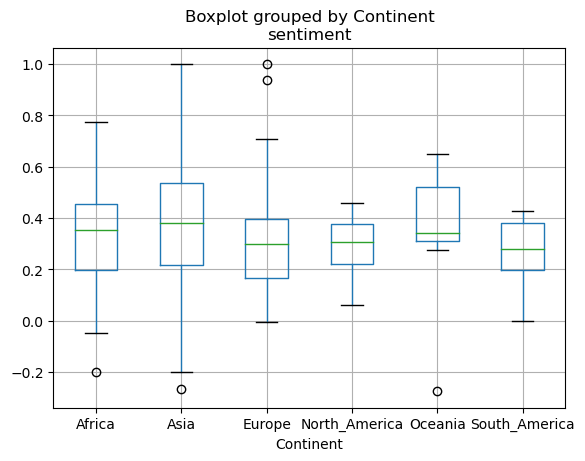

In [85]:
%matplotlib inline

# Boxplot of sentiment grouped by Continents
anthems_df.boxplot(column='sentiment', by='Continent')

In [86]:
# Anthems with most positive sentiment
#anthems_df[anthems_df.sentiment == 1].Anthem.head()

In [87]:
# Anthems with most negative sentiment
#anthems_df[anthems_df.sentiment == -1].Anthem.head()

In [88]:
# Widen the column display
#pd.set_option('max_colwidth', 500)

In [89]:
# Negative sentiment 
#anthems_df[(anthems_df.Continent == 3) & (anthems_df.sentiment < -0.3)].head()

In [90]:
# Reset the column display width
#pd.reset_option('max_colwidth')

In [91]:
%matplotlib inline

In [92]:
anthems_df

,Country,Continent,Anthem,length,sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052
...,...,...,...,...,...
185,Tunisia,Africa,O defenders of the Homeland! Rally around to t...,751,0.327543
186,Uganda,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",402,0.354091
187,Western Sahara,Africa,"O sons of the Sahara! In the battlefield, you ...",1099,0.361905
188,Zambia,Africa,"Stand and sing of Zambia, proud and free, Land...",684,0.518768


In [93]:
# Define X
# THIS IS THE WRONG CODE - X = anthems_df.drop('Country', 'length', 'Continent', 'sentiment', axis=1)

#FROM CHATPGPT 
lyrics = anthems_df.drop(['Country', 'length', 'Continent', 'sentiment'], axis=1)
#I did not have brackets .. 

In [94]:
lyrics
#I needed to define X for this next part ...

,Anthem
0,"Around our flag we stand united, With one wish..."
1,"Our Fatherland, free, independent, That has fo..."
2,"Land of mountains, land by the river, Land of ..."
3,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,"We, Belarusians, are peaceful people, Wholehea..."
...,...
185,O defenders of the Homeland! Rally around to t...
186,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,"O sons of the Sahara! In the battlefield, you ..."
188,"Stand and sing of Zambia, proud and free, Land..."


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

# Sample data (replace this with your actual national anthem data)
#anthems = [
 #   "O say can you see by the dawn's early light",
 #   "God save our gracious Queen",
 #   "O Canada! Our home and native land",
    # Add more national anthems...
#]


#X is defined above ^^^^

# TF-IDF Vectorization
#vectorizer = TfidfVectorizer()
#X2 = vectorizer.fit_transform(X)

#Creating a new SOMETHING called "X2"

# Apply k-means clustering
#k = 3  # Example: Choosing 3 clusters
#kmeans = KMeans(n_clusters=k, random_state=42)
#kmeans.fit(X2)

# Add cluster labels to DataFrame
#anthem_clusters = pd.DataFrame({'anthem': anthems, 'cluster': kmeans.labels_})

# Print clusters
#for cluster_id in range(k):
#    print(f"Cluster {cluster_id}:")
#    print(anthem_clusters[anthem_clusters['cluster'] == cluster_id]['anthem'])
#    print()
 
    #Not doing this right now

In [96]:
#trying something else

#%%time - still cannot find this "magic function", moving on.

#lets fix this ... 

# K-means with 2 clusters
#from sklearn.cluster import KMeans
#kmeans_2 = KMeans(n_clusters=2, n_init=1, random_state=1)
#kmeans_2.fit(X)

# need to convert string to float to use K-means. ... ugh!!




In [97]:
anthems_df

,Country,Continent,Anthem,length,sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052
...,...,...,...,...,...
185,Tunisia,Africa,O defenders of the Homeland! Rally around to t...,751,0.327543
186,Uganda,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",402,0.354091
187,Western Sahara,Africa,"O sons of the Sahara! In the battlefield, you ...",1099,0.361905
188,Zambia,Africa,"Stand and sing of Zambia, proud and free, Land...",684,0.518768


In [100]:
'''

from nltk.corpus import stopwords as nltk_stopwords
from nltk.probability import FreqDist

# Perform sentiment analysis on anthem lyrics
def analyze_sentiment(Anthem):
    # Perform sentiment analysis using TextBlob (you can use other libraries as well)
    blob = TextBlob(Anthem)
    sentiment = blob.sentiment.polarity
    return sentiment

# Extract themes from anthem lyrics
def extract_themes(Anthem):
    # Perform keyword extraction or topic modeling to identify themes
    # Example: Use NLTK for keyword extraction
    tokens = word_tokenize(Anthem)
    stopwords = set(nltk_stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]
    fdist = FreqDist(filtered_tokens)
    # Get the most common keywords/themes
    themes = fdist.most_common(5)  # Extract top 5 themes
    return themes

# Iterate over anthem lyrics and analyze sentiments and extract themes
for Anthem in X:
  #  sentiment = analyze_sentiment(Anthem.lyrics)
    sentiment = analyze_sentiment(Anthem)
    themes = extract_themes(Anthem)
 #   themes = extract_themes(anthem.lyrics)
    print(f"Country: {Anthem.title}")
    print(f"Sentiment: {sentiment}")
    print(f"Themes: {themes}")
    print()
    
'''

'\n\nfrom nltk.corpus import stopwords as nltk_stopwords\nfrom nltk.probability import FreqDist\n\n# Perform sentiment analysis on anthem lyrics\ndef analyze_sentiment(Anthem):\n    # Perform sentiment analysis using TextBlob (you can use other libraries as well)\n    blob = TextBlob(Anthem)\n    sentiment = blob.sentiment.polarity\n    return sentiment\n\n# Extract themes from anthem lyrics\ndef extract_themes(Anthem):\n    # Perform keyword extraction or topic modeling to identify themes\n    # Example: Use NLTK for keyword extraction\n    tokens = word_tokenize(Anthem)\n    stopwords = set(nltk_stopwords.words(\'english\'))\n    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]\n    fdist = FreqDist(filtered_tokens)\n    # Get the most common keywords/themes\n    themes = fdist.most_common(5)  # Extract top 5 themes\n    return themes\n\n# Iterate over anthem lyrics and analyze sentiments and extract themes\nfor Anthem in X:\n  #  sentim

In [101]:
# Rename the column
anthems_df = anthems_df.rename(columns={'Anthem': 'lyrics'})

# Display the DataFrame with the renamed column
print(anthems_df)

            Country Continent  \
0           Albania    Europe   
1           Armenia    Europe   
2           Austria    Europe   
3        Azerbaijan    Europe   
4           Belarus    Europe   
..              ...       ...   
185         Tunisia    Africa   
186          Uganda    Africa   
187  Western Sahara    Africa   
188          Zambia    Africa   
189        Zimbabwe    Africa   

                                                lyrics  length  sentiment  
0    Around our flag we stand united, With one wish...     794   0.371591  
1    Our Fatherland, free, independent, That has fo...     468   0.160000  
2    Land of mountains, land by the river, Land of ...     613   0.379502  
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...     818   0.445275  
4    We, Belarusians, are peaceful people, Wholehea...     805   0.242052  
..                                                 ...     ...        ...  
185  O defenders of the Homeland! Rally around to t...     751   0.3275

In [102]:
anthems_df

,Country,Continent,lyrics,length,sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052
...,...,...,...,...,...
185,Tunisia,Africa,O defenders of the Homeland! Rally around to t...,751,0.327543
186,Uganda,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",402,0.354091
187,Western Sahara,Africa,"O sons of the Sahara! In the battlefield, you ...",1099,0.361905
188,Zambia,Africa,"Stand and sing of Zambia, proud and free, Land...",684,0.518768


In [103]:
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords

# Perform sentiment analysis on anthem lyrics
def analyze_sentiment(lyrics):
    # Perform sentiment analysis using TextBlob (you can use other libraries as well)
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    return sentiment

# Extract themes from anthem lyrics
def extract_themes(lyrics):
    # Perform keyword extraction or topic modeling to identify themes
    tokens = word_tokenize(lyrics)
    stopwords = set(nltk_stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]
    fdist = FreqDist(filtered_tokens)
    # Get the most common keywords/themes
    themes = fdist.most_common(5)  # Extract top 5 themes
    return themes

# Iterate over anthem lyrics and analyze sentiments and extract themes
for index, row in anthems_df.iterrows():
    sentiment = analyze_sentiment(row['lyrics'])
    themes = extract_themes(row['lyrics'])
    print(f"Country: {row['Country']}")
    print(f"Sentiment: {sentiment}")
    print(f"Themes: {themes}")
    print()

Country: Albania
Sentiment: 0.3715909090909091
Themes: [('one', 3), ('sacred', 3), ('fatherland', 3), ('flag', 2), ('man', 2)]

Country: Armenia
Sentiment: 0.16
Themes: [('free', 2), ('independent', 2), ('Armenia', 2), ('Let', 2), ('dies', 2)]

Country: Austria
Sentiment: 0.3795021645021645
Themes: [('Land', 3), ('Austria', 3), ('land', 2), ('us', 2), ('mountains', 1)]

Country: Azerbaijan
Sentiment: 0.44527463045987214
Themes: [('Azerbaijan', 6), ('thy', 6), ('glorious', 3), ('Fatherland', 3), ('stand', 3)]

Country: Belarus
Sentiment: 0.2420519111570248
Themes: [('Glory', 4), ('peoples', 4), ('Motherland', 3), ('blessed', 2), ('name', 2)]

Country: Belgium
Sentiment: 0.40719696969696967
Themes: [('King', 4), ('Law', 4), ('shall', 2), ('Liberty', 2), ('Freedom', 2)]

Country: Bosnia and Herzegovina
Sentiment: 0.3982954545454545
Themes: [('light', 1), ('soul', 1), ('Eternal', 1), ('fire', 1), ('flame', 1)]

Country: Bulgaria
Sentiment: 0.2553571428571429
Themes: [('Dear', 2), ('Motherl

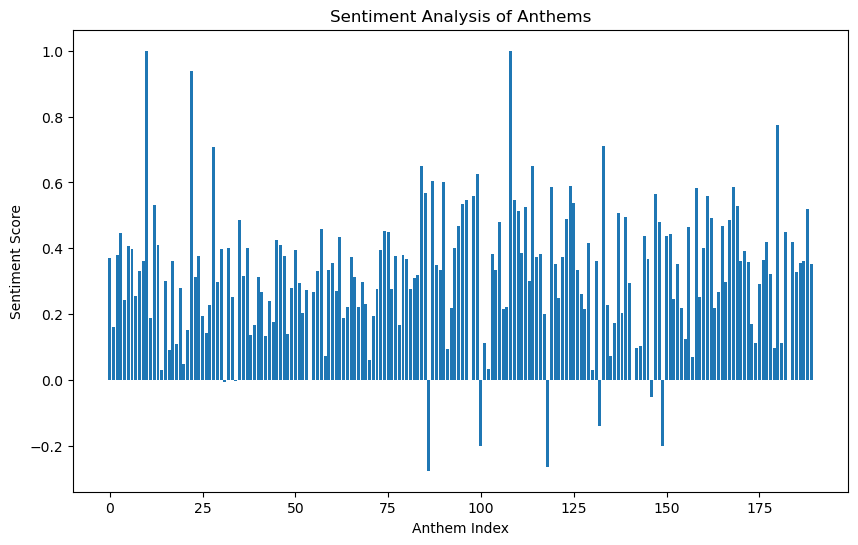

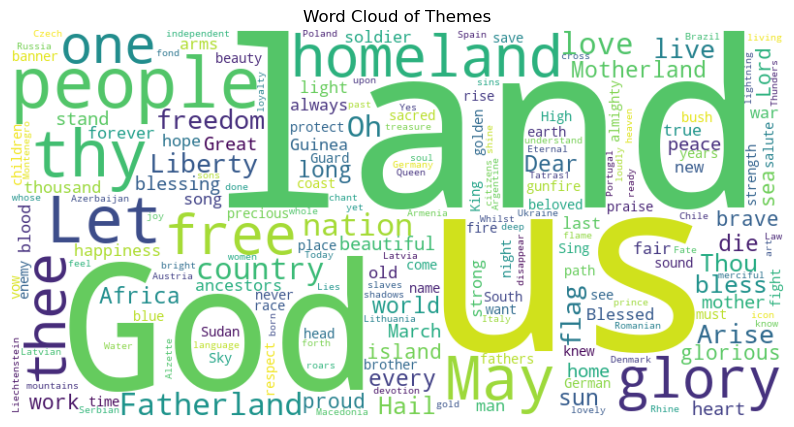

In [104]:
#To turn the sentiment analysis and theme extraction into a visual, you can create a bar chart or a word cloud to represent the sentiment scores and themes for each anthem. Here's how you can do it using Python libraries:

#1. **Bar Chart for Sentiment Scores**: Create a bar chart to visualize the sentiment scores for each anthem.

#2. **Word Cloud for Themes**: Generate a word cloud to visualize the most common themes extracted from anthem lyrics.

#Here's an example code snippet to create these visuals using matplotlib and wordcloud libraries:

from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Perform sentiment analysis on anthem lyrics
def analyze_sentiment(lyrics):
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    return sentiment

# Extract themes from anthem lyrics
def extract_themes(lyrics):
    tokens = word_tokenize(lyrics)
    stopwords = set(nltk_stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]
    fdist = FreqDist(filtered_tokens)
    themes = fdist.most_common(5)  # Extract top 5 themes
    return themes

# Initialize lists to store sentiment scores and themes
sentiments = []
all_themes = []

# Iterate over anthem lyrics and analyze sentiments and extract themes
for index, row in anthems_df.iterrows():
    sentiment = analyze_sentiment(row['lyrics'])
    themes = extract_themes(row['lyrics'])
    sentiments.append(sentiment)
    all_themes.extend([theme[0] for theme in themes])  # Extract theme words only

# Create a bar chart for sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sentiments)), sentiments)
plt.xlabel('Anthem Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Anthems')
plt.show()

# Create a word cloud for themes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_themes))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Themes')
plt.show()

#This code will generate a bar chart representing the sentiment scores for each anthem and a word cloud showing the most common themes extracted from anthem lyrics. You can further customize these visuals to match your preferences and requirements.

In [105]:
#To pull out the sentiments per continent, you first need to have a dataset that includes the continent information along with the anthem lyrics. If your dataset already includes the continent information, you can use it directly. Otherwise, you may need to merge or join your anthem dataset with another dataset that contains continent information.

#Once you have the dataset with continent information, you can calculate the average sentiment score for each continent by grouping the data by continent and then calculating the mean sentiment score for each group.

#Here's how you can do it in Python using pandas:

import pandas as pd
from textblob import TextBlob

# Sample data (replace this with your actual dataset)
#data = {
#    'Country': ['Country A', 'Country B', 'Country C'],
#    'Continent': ['Asia', 'Europe', 'Asia'],
#    'Lyrics': ['Anthem lyrics A', 'Anthem lyrics B', 'Anthem lyrics #C']
#}

# Convert data to DataFrame
#anthems_df = pd.DataFrame(data)

# Perform sentiment analysis on anthem lyrics
def analyze_sentiment(lyrics):
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    return sentiment

# Add sentiment scores to DataFrame
anthems_df['sentiment'] = anthems_df['lyrics'].apply(analyze_sentiment)

# Calculate average sentiment score per continent
average_sentiment_per_continent = anthems_df.groupby('Continent')['sentiment'].mean()

print(average_sentiment_per_continent)

#This code will calculate the average sentiment score for each continent based on the anthem lyrics in the dataset. Replace the sample data with your actual dataset, which should include the 'Country' and 'Continent' columns, as well as the 'Lyrics' column containing the anthem lyrics.

#After running the code, you will get the average sentiment score for each continent, allowing you to analyze sentiments per continent.

Continent
Africa           0.318598
Asia             0.354828
Europe           0.308158
North_America    0.297452
Oceania          0.350256
South_America    0.270849
Name: sentiment, dtype: float64


In [106]:
anthems_df

,Country,Continent,lyrics,length,sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052
...,...,...,...,...,...
185,Tunisia,Africa,O defenders of the Homeland! Rally around to t...,751,0.327543
186,Uganda,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",402,0.354091
187,Western Sahara,Africa,"O sons of the Sahara! In the battlefield, you ...",1099,0.361905
188,Zambia,Africa,"Stand and sing of Zambia, proud and free, Land...",684,0.518768


In [107]:
# Extract themes from anthem lyrics
def extract_themes(lyrics):
    tokens = word_tokenize(lyrics)
    stopwords = set(nltk_stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]
    fdist = FreqDist(filtered_tokens)
    # Get the most common keywords/themes
    themes = fdist.most_common(8)  # Extract top 8 themes
    return themes

# Add themes to DataFrame
anthems_df['Themes'] = anthems_df['lyrics'].apply(extract_themes)

# Group themes by continent
themes_by_continent = anthems_df.groupby('Continent')['Themes'].sum()

print(themes_by_continent)

Continent
Africa           [(witness, 12), (live, 5), (determined, 4), (A...
Asia             [(land, 3), (every, 2), (Land, 2), (ever, 2), ...
Europe           [(one, 3), (sacred, 3), (fatherland, 3), (flag...
North_America    [(home, 6), (land, 5), (Oh, 4), (banner, 4), (...
Oceania          [(let, 5), (us, 4), (Australia, 4), (fair, 4),...
South_America    [(people, 5), (freedom, 4), (see, 4), (Argenti...
Name: Themes, dtype: object


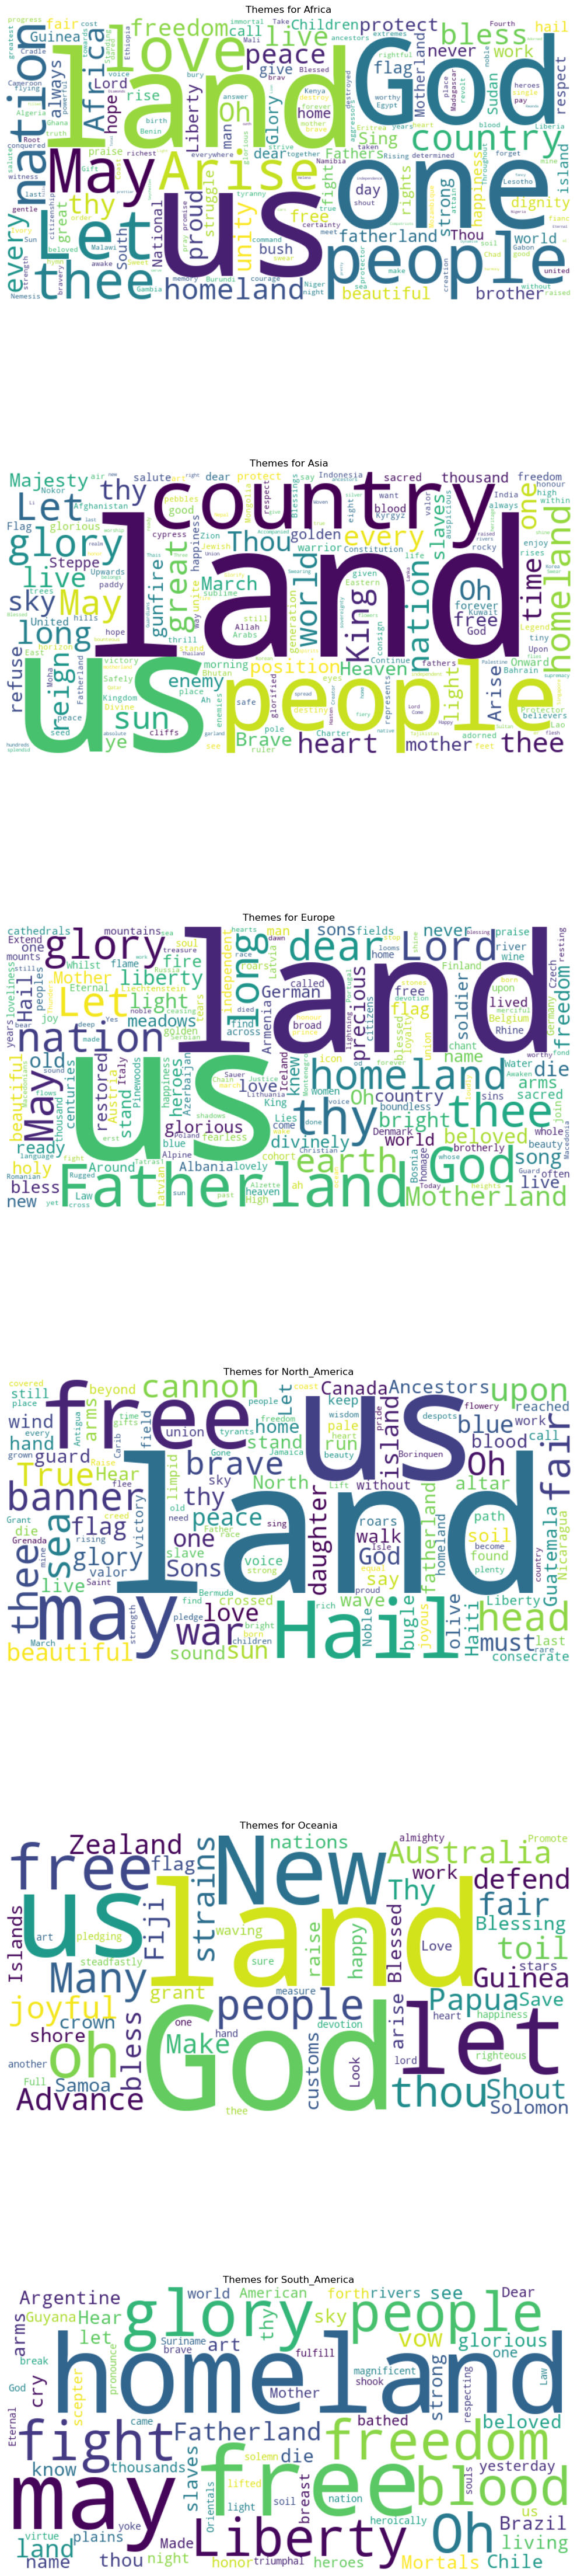

In [108]:
# Extract themes from anthem lyrics
def extract_themes(lyrics):
    tokens = word_tokenize(lyrics)
    stopwords = set(nltk_stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords and word.isalnum()]
    fdist = FreqDist(filtered_tokens)
    themes = fdist.most_common(8)  # Extract top 8 themes
    return themes

# Add themes to DataFrame
anthems_df['Themes'] = anthems_df['lyrics'].apply(extract_themes)

# Generate word cloud for each continent
def generate_wordcloud(themes):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(theme[0] for theme in themes))
    return wordcloud

wordclouds = anthems_df.groupby('Continent')['Themes'].sum().apply(generate_wordcloud)

# Plot word clouds for themes by continent
fig, axs = plt.subplots(len(wordclouds), 1, figsize=(10, 8*len(wordclouds)))

for idx, (continent, wordcloud) in enumerate(wordclouds.items()):
    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(f'Themes for {continent}')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

#This code will generate a word cloud for each continent, visualizing the main themes extracted from the anthem lyrics. Each word cloud will represent the frequency of occurrence of words across all anthems from the respective continent. Adjust the visualization parameters as needed to fit your preferences and requirements.

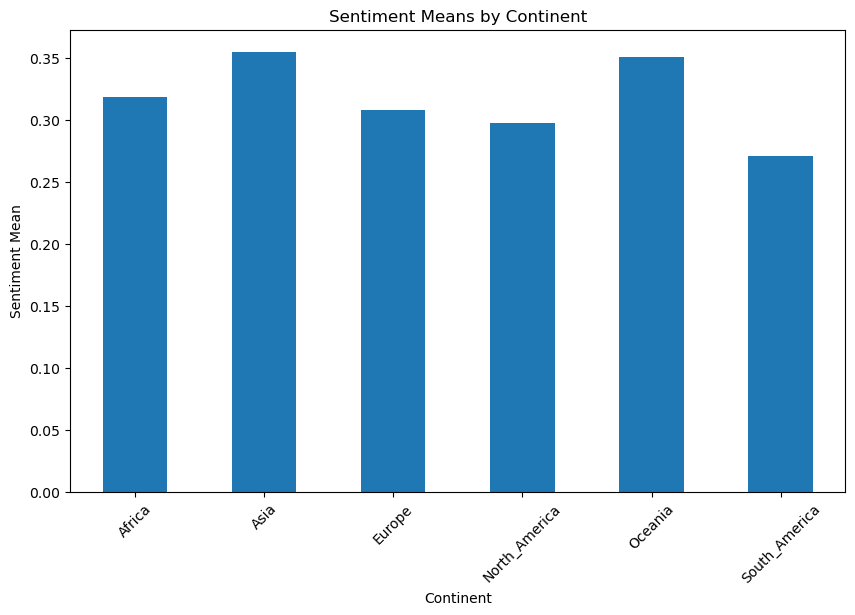

In [109]:
# Perform sentiment analysis on anthem lyrics
def analyze_sentiment(lyrics):
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    return sentiment

# Add sentiment scores to DataFrame
anthems_df['Sentiment'] = anthems_df['lyrics'].apply(analyze_sentiment)

# Calculate average sentiment score per continent
sentiment_means = anthems_df.groupby('Continent')['sentiment'].mean()

# Plot bar chart for sentiment means
sentiment_means.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Continent')
plt.ylabel('Sentiment Mean')
plt.title('Sentiment Means by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#This code will generate a bar chart representing the sentiment means for each continent based on the anthem lyrics in the dataset. Replace the sample data with your actual dataset, which should include the 'Country' and 'Continent' columns, as well as the 'Lyrics' column containing the anthem lyrics.



In [112]:
'''
# Sample world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge sentiment means data with world map data
continent_sentiment_means = anthems_df.DataFrame(sentiment_means_data).groupby('Continent')['Sentiment_Mean'].mean().reset_index()
world = world.merge(continent_sentiment_means, how='left', left_on='continent', right_on='Continent')

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot heatmap
world.plot(column='Sentiment_Mean', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Sentiment Means by Continent')
plt.show()

#In this code:

#Replace sentiment_means_data with your actual sentiment means data, ensuring that it contains sentiment means for each country along with their respective continents.
#Aggregate the sentiment means by continent using groupby and mean() functions.
#Merge the aggregated sentiment means data with the geometries of the continents from the world map data.
#Plot the heatmap of sentiment means by continent.
#Adjust the visualization parameters as needed to fit your preferences and requirements.

'''

'\n# Sample world map data\nworld = gpd.read_file(gpd.datasets.get_path(\'naturalearth_lowres\'))\n\n# Merge sentiment means data with world map data\ncontinent_sentiment_means = anthems_df.DataFrame(sentiment_means_data).groupby(\'Continent\')[\'Sentiment_Mean\'].mean().reset_index()\nworld = world.merge(continent_sentiment_means, how=\'left\', left_on=\'continent\', right_on=\'Continent\')\n\n# Plot the world map\nfig, ax = plt.subplots(figsize=(10, 6))\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes("right", size="5%", pad=0.1)\n\n# Plot heatmap\nworld.plot(column=\'Sentiment_Mean\', cmap=\'RdYlGn\', linewidth=0.8, ax=ax, edgecolor=\'0.8\', legend=True, cax=cax)\nax.set_title(\'Sentiment Means by Continent\')\nplt.show()\n\n#In this code:\n\n#Replace sentiment_means_data with your actual sentiment means data, ensuring that it contains sentiment means for each country along with their respective continents.\n#Aggregate the sentiment means by continent using groupby and 

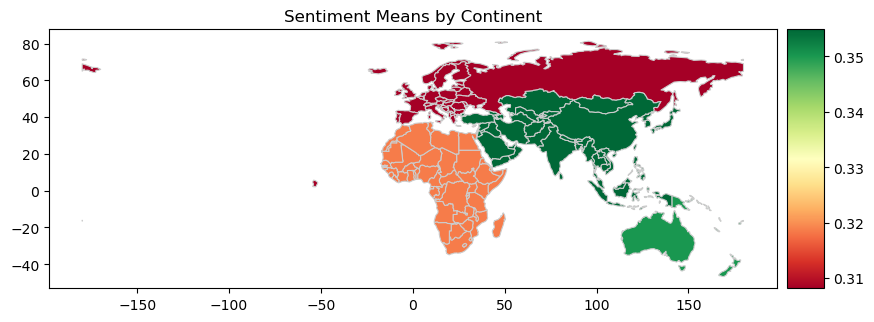

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

# Sample world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge sentiment means data with world map data
continent_sentiment_means = pd.DataFrame(anthems_df).groupby('Continent')['Sentiment'].mean().reset_index()
world = world.merge(continent_sentiment_means, how='left', left_on='continent', right_on='Continent')

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot heatmap
world.plot(column='Sentiment', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Sentiment Means by Continent')
plt.show()

In [114]:
anthems_df

,Country,Continent,lyrics,length,sentiment,Themes,Sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591,"[(one, 3), (sacred, 3), (fatherland, 3), (flag...",0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000,"[(free, 2), (independent, 2), (Armenia, 2), (L...",0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502,"[(Land, 3), (Austria, 3), (land, 2), (us, 2), ...",0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275,"[(Azerbaijan, 6), (thy, 6), (glorious, 3), (Fa...",0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052,"[(Glory, 4), (peoples, 4), (Motherland, 3), (b...",0.242052
...,...,...,...,...,...,...,...
185,Tunisia,Africa,O defenders of the Homeland! Rally around to t...,751,0.327543,"[(glory, 4), (Tunisia, 3), (die, 2), (Let, 2),...",0.327543
186,Uganda,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",402,0.354091,"[(Oh, 3), (Uganda, 3), (land, 3), (always, 2),...",0.354091
187,Western Sahara,Africa,"O sons of the Sahara! In the battlefield, you ...",1099,0.361905,"[(path, 6), (people, 5), (invader, 4), (ones, ...",0.361905
188,Zambia,Africa,"Stand and sing of Zambia, proud and free, Land...",684,0.518768,"[(Zambia, 7), (one, 6), (free, 5), (strong, 4)...",0.518768


In [115]:
# Rename a value in rows
anthems_df['Continent'] = anthems_df['Continent'].replace({'South_America': 'South America', 'North_America': 'North America'})

print(anthems_df)

            Country Continent  \
0           Albania    Europe   
1           Armenia    Europe   
2           Austria    Europe   
3        Azerbaijan    Europe   
4           Belarus    Europe   
..              ...       ...   
185         Tunisia    Africa   
186          Uganda    Africa   
187  Western Sahara    Africa   
188          Zambia    Africa   
189        Zimbabwe    Africa   

                                                lyrics  length  sentiment  \
0    Around our flag we stand united, With one wish...     794   0.371591   
1    Our Fatherland, free, independent, That has fo...     468   0.160000   
2    Land of mountains, land by the river, Land of ...     613   0.379502   
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...     818   0.445275   
4    We, Belarusians, are peaceful people, Wholehea...     805   0.242052   
..                                                 ...     ...        ...   
185  O defenders of the Homeland! Rally around to t...     751  

In [116]:
anthems_df.head(50)

,Country,Continent,lyrics,length,sentiment,Themes,Sentiment
0,Albania,Europe,"Around our flag we stand united, With one wish...",794,0.371591,"[(one, 3), (sacred, 3), (fatherland, 3), (flag...",0.371591
1,Armenia,Europe,"Our Fatherland, free, independent, That has fo...",468,0.160000,"[(free, 2), (independent, 2), (Armenia, 2), (L...",0.160000
2,Austria,Europe,"Land of mountains, land by the river, Land of ...",613,0.379502,"[(Land, 3), (Austria, 3), (land, 2), (us, 2), ...",0.379502
3,Azerbaijan,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",818,0.445275,"[(Azerbaijan, 6), (thy, 6), (glorious, 3), (Fa...",0.445275
4,Belarus,Europe,"We, Belarusians, are peaceful people, Wholehea...",805,0.242052,"[(Glory, 4), (peoples, 4), (Motherland, 3), (b...",0.242052
5,Belgium,Europe,"O dear Belgium, O holy land of the fathers Ã¢â...",472,0.407197,"[(King, 4), (Law, 4), (shall, 2), (Liberty, 2)...",0.407197
6,Bosnia and Herzegovina,Europe,You're the light of the soul Eternal fire's fl...,322,0.398295,"[(light, 1), (soul, 1), (Eternal, 1), (fire, 1...",0.398295
7,Bulgaria,Europe,"Proud Balkan Mountains, next to it the Danube ...",508,0.255357,"[(Dear, 2), (Motherland, 2), (heaven, 2), (ear...",0.255357
8,Croatia,Europe,"Our beautiful homeland, Oh so fearless and gra...",497,0.331250,"[(Dear, 4), (Whilst, 4), (glory, 2), (love, 2)...",0.331250
9,Cyprus,Europe,"We knew thee of old, O, divinely restored, By ...",199,0.362500,"[(thee, 2), (thy, 2), (Hail, 2), (knew, 1), (o...",0.362500


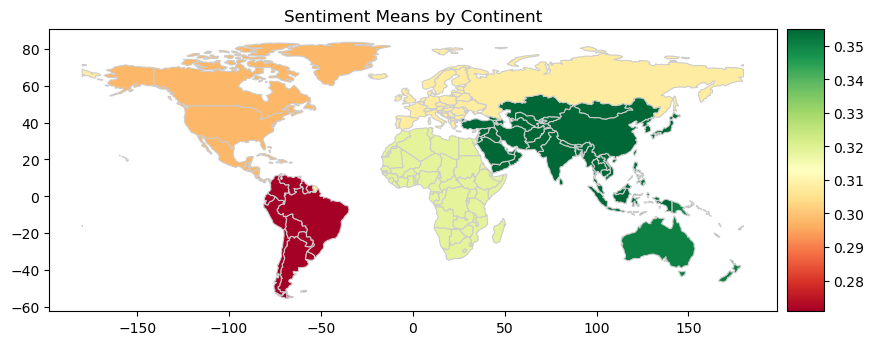

In [117]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

# Sample world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge sentiment means data with world map data
continent_sentiment_means = pd.DataFrame(anthems_df).groupby('Continent')['Sentiment'].mean().reset_index()
world = world.merge(continent_sentiment_means, how='left', left_on='continent', right_on='Continent')

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot heatmap
world.plot(column='Sentiment', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Sentiment Means by Continent')
plt.show()

Mean Sentiment for South America: 0.2708491219672114


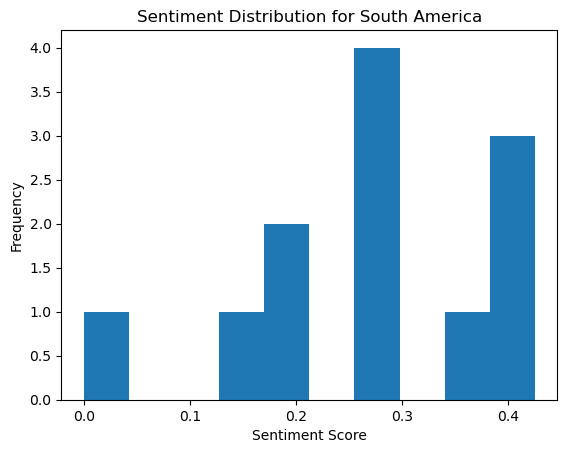

In [118]:
#To analyze the sentiment of one continent further, you can follow these steps:

#1. **Filter Data**: Filter your dataset to include only the data corresponding to the continent you are interested in.

#2. **Analyze Sentiment**: Once you have filtered the data, analyze the sentiment further using the techniques you prefer, such as calculating sentiment scores, sentiment distributions, or sentiment trends.

#3. **Visualize Results**: Visualize the sentiment analysis results to gain insights into the sentiment patterns within the selected continent.

#Here's a code example demonstrating these steps:


import pandas as pd
from textblob import TextBlob



# Filter data for the continent of interest (e.g., 'Asia')
continent_of_interest = 'South America'
continent_anthems_df = anthems_df[anthems_df['Continent'] == continent_of_interest]

# Perform sentiment analysis on anthem lyrics for the selected continent
sentiments = []
for lyrics in continent_anthems_df['lyrics']:
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Add sentiment scores to the DataFrame
continent_anthems_df['Sentiment'] = sentiments

# Analyze further (e.g., calculate mean sentiment)
mean_sentiment = continent_anthems_df['Sentiment'].mean()
print(f"Mean Sentiment for {continent_of_interest}: {mean_sentiment}")

# Visualize results (e.g., histogram of sentiment scores)
continent_anthems_df['Sentiment'].plot(kind='hist', bins=10, title='Sentiment Distribution for {}'.format(continent_of_interest))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#In this code:

#- We filter the DataFrame to include only data for the continent of interest (in this case, 'Asia').
#- We perform sentiment analysis on the anthem lyrics for the selected continent.
#- We calculate the mean sentiment score for the selected continent.
#- We visualize the sentiment distribution using a histogram.

#You can customize the sentiment analysis and visualization techniques according to your specific requirements and preferences.

In [119]:
# Filter data for the continent of interest (e.g., 'Asia')
continent_of_interest = 'South America'
continent_anthems_df = anthems_df[anthems_df['Continent'] == continent_of_interest]

# Perform sentiment analysis on anthem lyrics for each country
sentiments = []
for lyrics in continent_anthems_df['lyrics']:
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Add sentiment scores to the DataFrame
continent_anthems_df['Sentiment'] = sentiments

# Calculate sentiment mean for each country
sentiment_means_by_country = continent_anthems_df.groupby('Country')['Sentiment'].mean()

# Find the country with the lowest sentiment mean
country_with_lowest_sentiment = sentiment_means_by_country.idxmin()
lowest_sentiment_mean = sentiment_means_by_country.min()

print(f"The country on {continent_of_interest} with the lowest sentiment mean is {country_with_lowest_sentiment} with a sentiment mean of {lowest_sentiment_mean}")


The country on South America with the lowest sentiment mean is Uruguay with a sentiment mean of 0.0


In [120]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt

# Create a new PowerPoint presentation
prs = Presentation()

# Add a slide with a title layout
slide_layout = prs.slide_layouts[8]  # Title slide layout
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "The Establishment of the World's Anthems"
subtitle.text = "Generated from Python"

# Generate and insert a matplotlib plot into a slide
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_title('')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.close(fig)  # Close the figure to prevent it from being displayed

# Convert matplotlib figure to an image and insert it into the PowerPoint slide
fig.savefig('temp_plot.png')  # Save the figure as an image
slide = prs.slides.add_slide(prs.slide_layouts[1])  # Blank slide layout
left = Inches(1)
top = Inches(2)
pic = slide.shapes.add_picture('temp_plot.png', left, top)

# Delete the temporary plot image file
import os
os.remove('temp_plot.png')

# Save the PowerPoint presentation to a file
prs.save('my_presentation.pptx')